## House Prices - Advanced Regression Techniques with Ames House Dataset

Predição de preços de venda (SalePrice) de imovéis imobiliários. A base contém 79 features que descrevem vários aspectos de propriedades, como bairro, tipo de construção e qualidade. A partir dessa base, será criada um modelo preditivio de preços usando Árvore de Decisão (Random Forest) 

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML DDLs
import scipy as stats
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

2025-07-18 16:05:00.287429: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-18 16:05:04.666414: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-18 16:05:06.406988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752854709.761646    3557 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752854710.921991    3557 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752854717.783144    3557 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
df_train = pd.read_csv('train.csv')
df_train.shape

(1460, 81)

In [5]:
df = df_train.copy()

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train = df_train.drop('Id', axis=1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


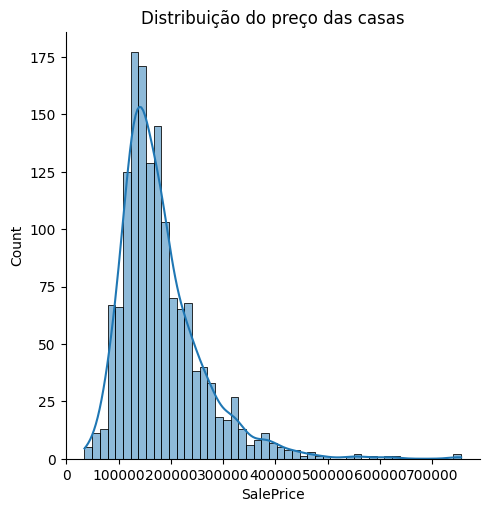

In [9]:
print(df_train['SalePrice'].describe())
sns.displot(df_train['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.title('Distribuição do preço das casas')
plt.show()

# Insights: 
1. Simetria positiva (distribuição simétrica à direita)
2. Média sendo puxada para a direita
3. Mediana é uma medida melhor do que média nesse caso.
4. Predizer casas com valores maiores será um desafio maior. 

In [10]:
## looking for numerical features
list(set(df_train.dtypes.tolist()))
numerical_features = df_train.select_dtypes(include=['int64', 'float64'])
numerical_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

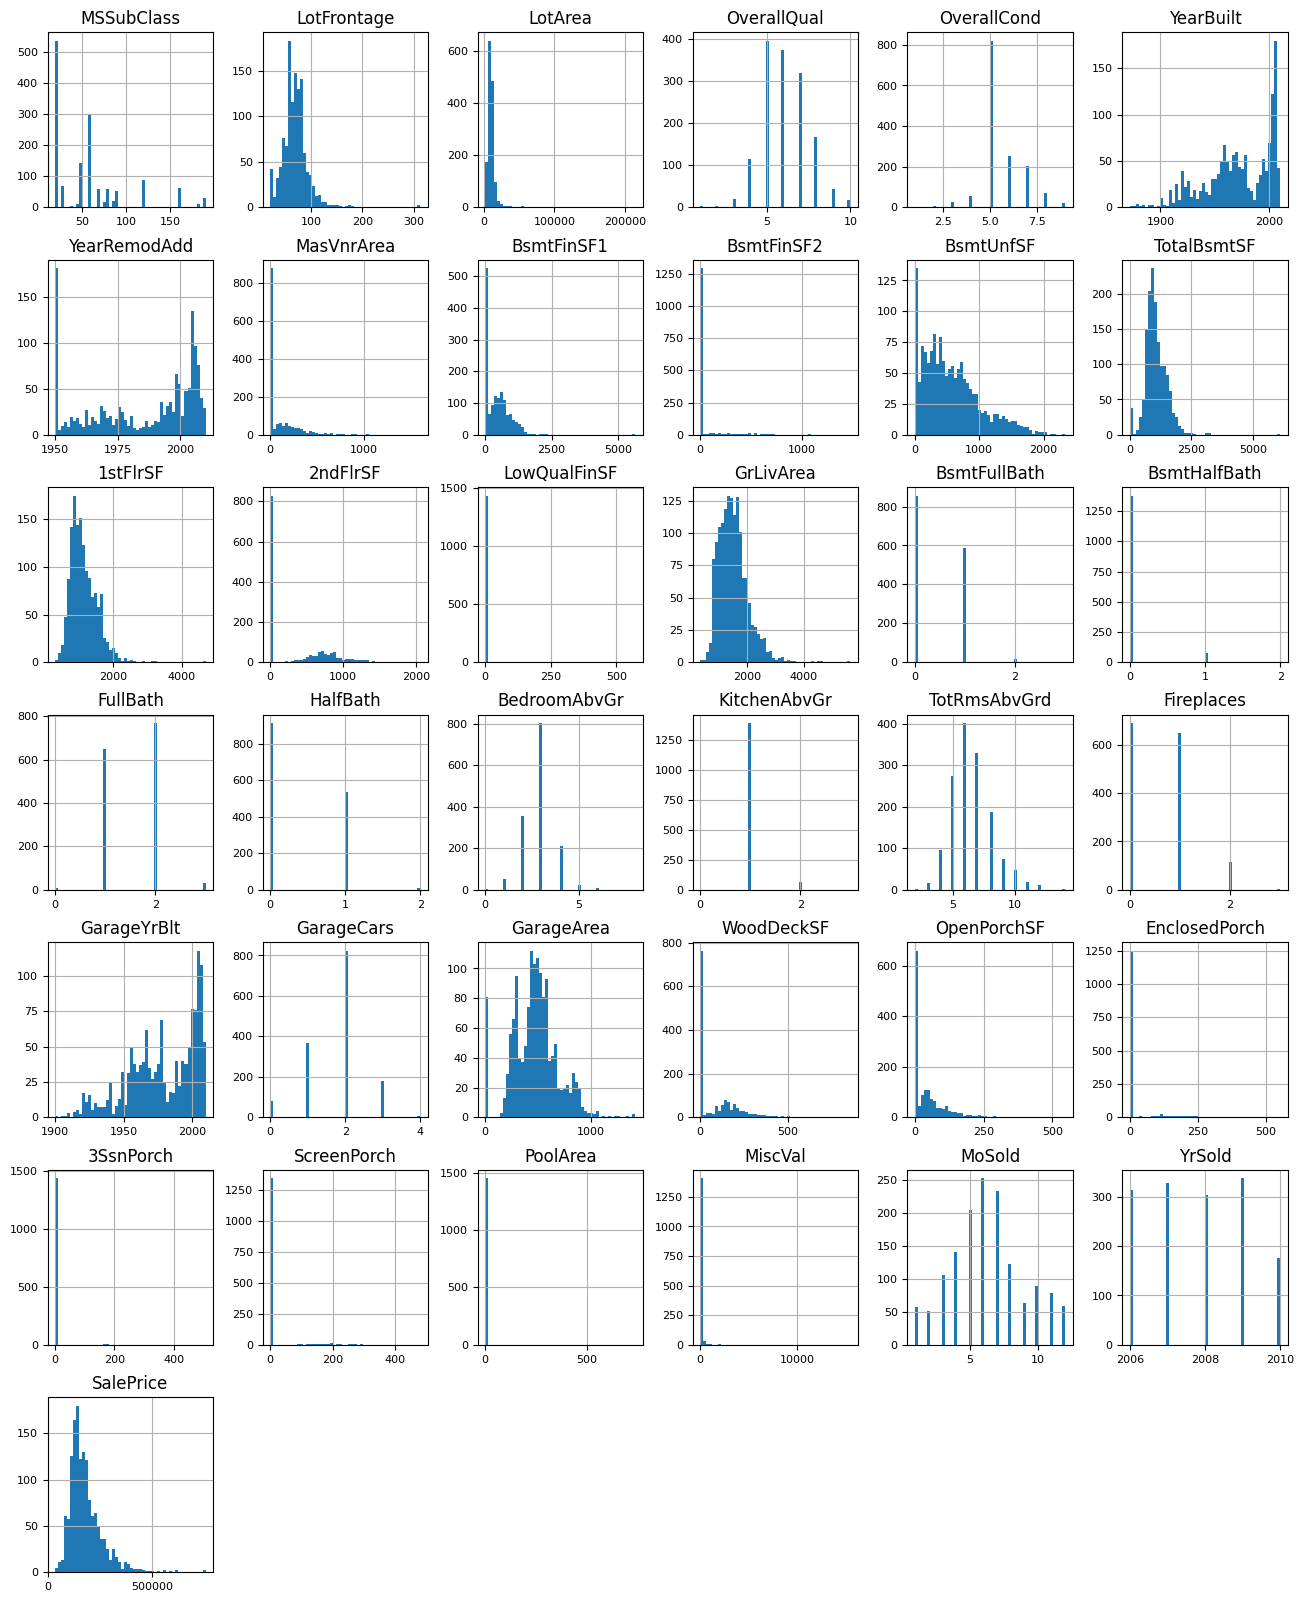

In [11]:
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [12]:
print("Tamanho da base de treino:",len(df_train))

Tamanho da base de treino: 1460


In [13]:
## Slipitting into to datasets: test and train
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df_train)
print("{} exemplos na base de treino, {} examples na base de teste.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1043 exemplos na base de treino, 417 examples na base de teste.


## Usando Keras

In [14]:
## Converting pd.DataFrame to TensorFlow

label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df_train, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds_pd = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

2025-07-18 16:05:39.989147: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
# Listing All avaiable models in TensorFlow Decision Forests

tfdf.keras.get_all_models() 

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [16]:
# using Random Forest model

rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

Use /tmp/tmpn64d02t3 as temporary training directory


In [17]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:04.654410. Found 1460 examples.
Training model...


I0000 00:00:1752854745.168822    3557 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1752854745.168931    3557 kernel.cc:783] Collect training examples
I0000 00:00:1752854745.168943    3557 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1752854745.169813    3557 kernel.cc:401] Number of batches: 2
I0000 00:00:1752854745.169837    3557 kernel.cc:402] Number of examples: 1460
I0000 00:00:1752854745.172949    3557 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1752854745.172992    3557 data_spec_inference.cc:354] 1 item(s) have been prun

Model trained in 0:00:03.103614
Compiling model...


I0000 00:00:1752854748.222979    3557 decision_forest.cc:808] Model loaded with 300 root(s), 138574 node(s), and 74 input feature(s).
I0000 00:00:1752854748.226211    3557 abstract_model.cc:1439] Engine "RandomForestOptPred" built
2025-07-18 16:05:48.226257: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


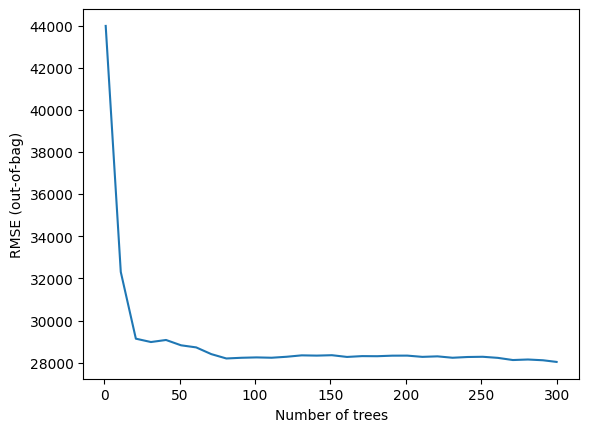

In [18]:
# Evaluating with Out-of-Bag (OOB) data and the validation dataset
import matplotlib.pyplot as plt

logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

A partir do gráfico, podemos perceber que o modelo possui um RMSE menor quando existe um número maior de árvores. Usar entre 30 - 50 árvores é o ponto ótimo, pois oferece quase a mesma perfomance que usar 300 árvores porém com menos custo computacional. Também é possível perceber que o algortimo não sofre overfitting. 

In [19]:
# Viewing the OBB dataset:

inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1460, accuracy=None, loss=None, rmse=28035.692834510002, ndcg=None, aucs=None, auuc=None, qini=None)

In [20]:
# Evaluating the model

evaluation = rf.evaluate(valid_ds_pd, return_dict=True)

for name, value in evaluation.items():
    print(f"{name}: {value}")

1/1 [==============================] - 1s 899ms/step - loss: 0.0000e+00
loss: 0.0


In [21]:
# Analysing variables importance

print(f"Variáveis de importância:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Variáveis de importância:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [22]:
inspector.variable_importances()["NUM_AS_ROOT"] # Sorted from the most important to the least important

[("OverallQual" (1; #62), 99.0),
 ("ExterQual" (4; #22), 63.0),
 ("Neighborhood" (4; #59), 41.0),
 ("GarageCars" (1; #32), 31.0),
 ("GrLivArea" (1; #38), 24.0),
 ("YearBuilt" (1; #76), 14.0),
 ("TotalBsmtSF" (1; #73), 9.0),
 ("GarageArea" (1; #31), 6.0),
 ("KitchenQual" (4; #44), 6.0),
 ("BsmtQual" (4; #14), 5.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("GarageYrBlt" (1; #37), 1.0)]

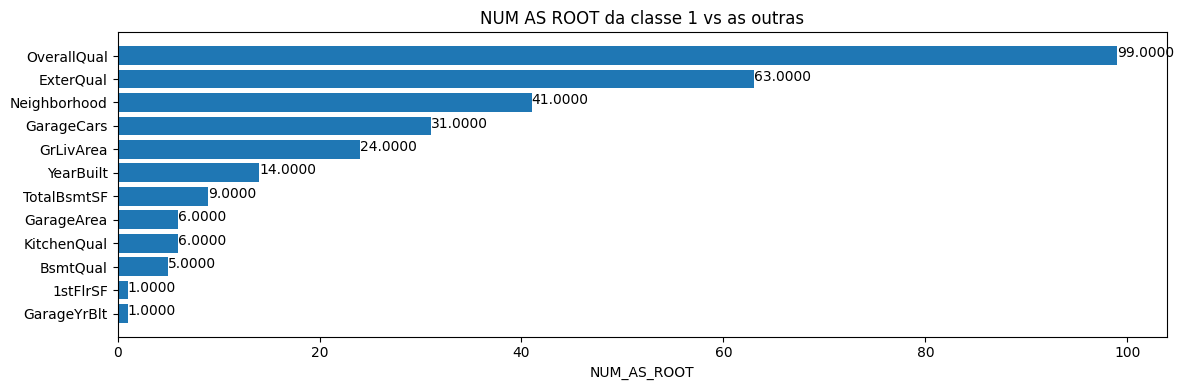

In [23]:
# Plotting variable importance using matplotlib

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT da classe 1 vs as outras")
plt.tight_layout()
plt.show()

In [24]:
# Predicting values

test_data = pd.read_csv('test.csv')

ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

# Predictors
preds = rf.predict(test_ds)

output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()}) # Removing the extra dimension with size 1

output.head()

2/2 [==============================] - 0s 28ms/step


,Id,SalePrice
0,1461,127140.390625
1,1462,154835.218750
2,1463,179722.875000
3,1464,184686.703125
4,1465,193947.812500


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_true_list = []
X_list = []

for batch in valid_ds_pd:  
    if isinstance(batch, tuple):  # (features, labels)
        X_batch, y_batch = batch
        y_true_list.append(y_batch.numpy())
        X_list.append(X_batch)
    else:
        break

# Convert to numpy arrays
y_true = np.concatenate(y_true_list)

# Make predictions on the dataset
y_pred = rf.predict(valid_ds_pd).squeeze()

# Calculate metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.4f}")

1/1 [==============================] - 0s 162ms/step
Mean Squared Error (MSE): 277937344.00
Mean Absolute Error (MAE): 8514.63
R^2 Score: 0.9597


2025-07-18 16:05:51.594818: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


-> ANÁLISE DETALHADA DE PERFORMANCE

-> ESTATÍSTICAS DOS ERROS:
Erro Médio (Bias): $231.15
Desvio Padrão dos Erros: $16,669.85
RMSE: $16,671.45
MAPE (Erro Percentual Médio): 5.02%
Mediana do Erro Absoluto: $5,030.42

-> PERFORMANCE POR FAIXA DE PREÇO:
Muito Baixo: MAE=$5,826, R²=0.896, MAPE=5.6%
Baixo: MAE=$9,356, R²=0.878, MAPE=4.0%
Médio: MAE=$18,762, R²=0.741, MAPE=5.0%
Alto: MAE=$352, R²=nan, MAPE=0.1%
Muito Alto: MAE=$168,018, R²=-1130.025, MAPE=22.4%

-> DISTRIBUIÇÃO DOS ERROS ABSOLUTOS:
50% das predições têm erro ≤ $5,030
75% das predições têm erro ≤ $10,207
90% das predições têm erro ≤ $17,499
95% das predições têm erro ≤ $25,486
99% das predições têm erro ≤ $47,805

-> ANÁLISE DE OUTLIERS:
Outliers (erros > $22,147): 28 casos (6.7%)


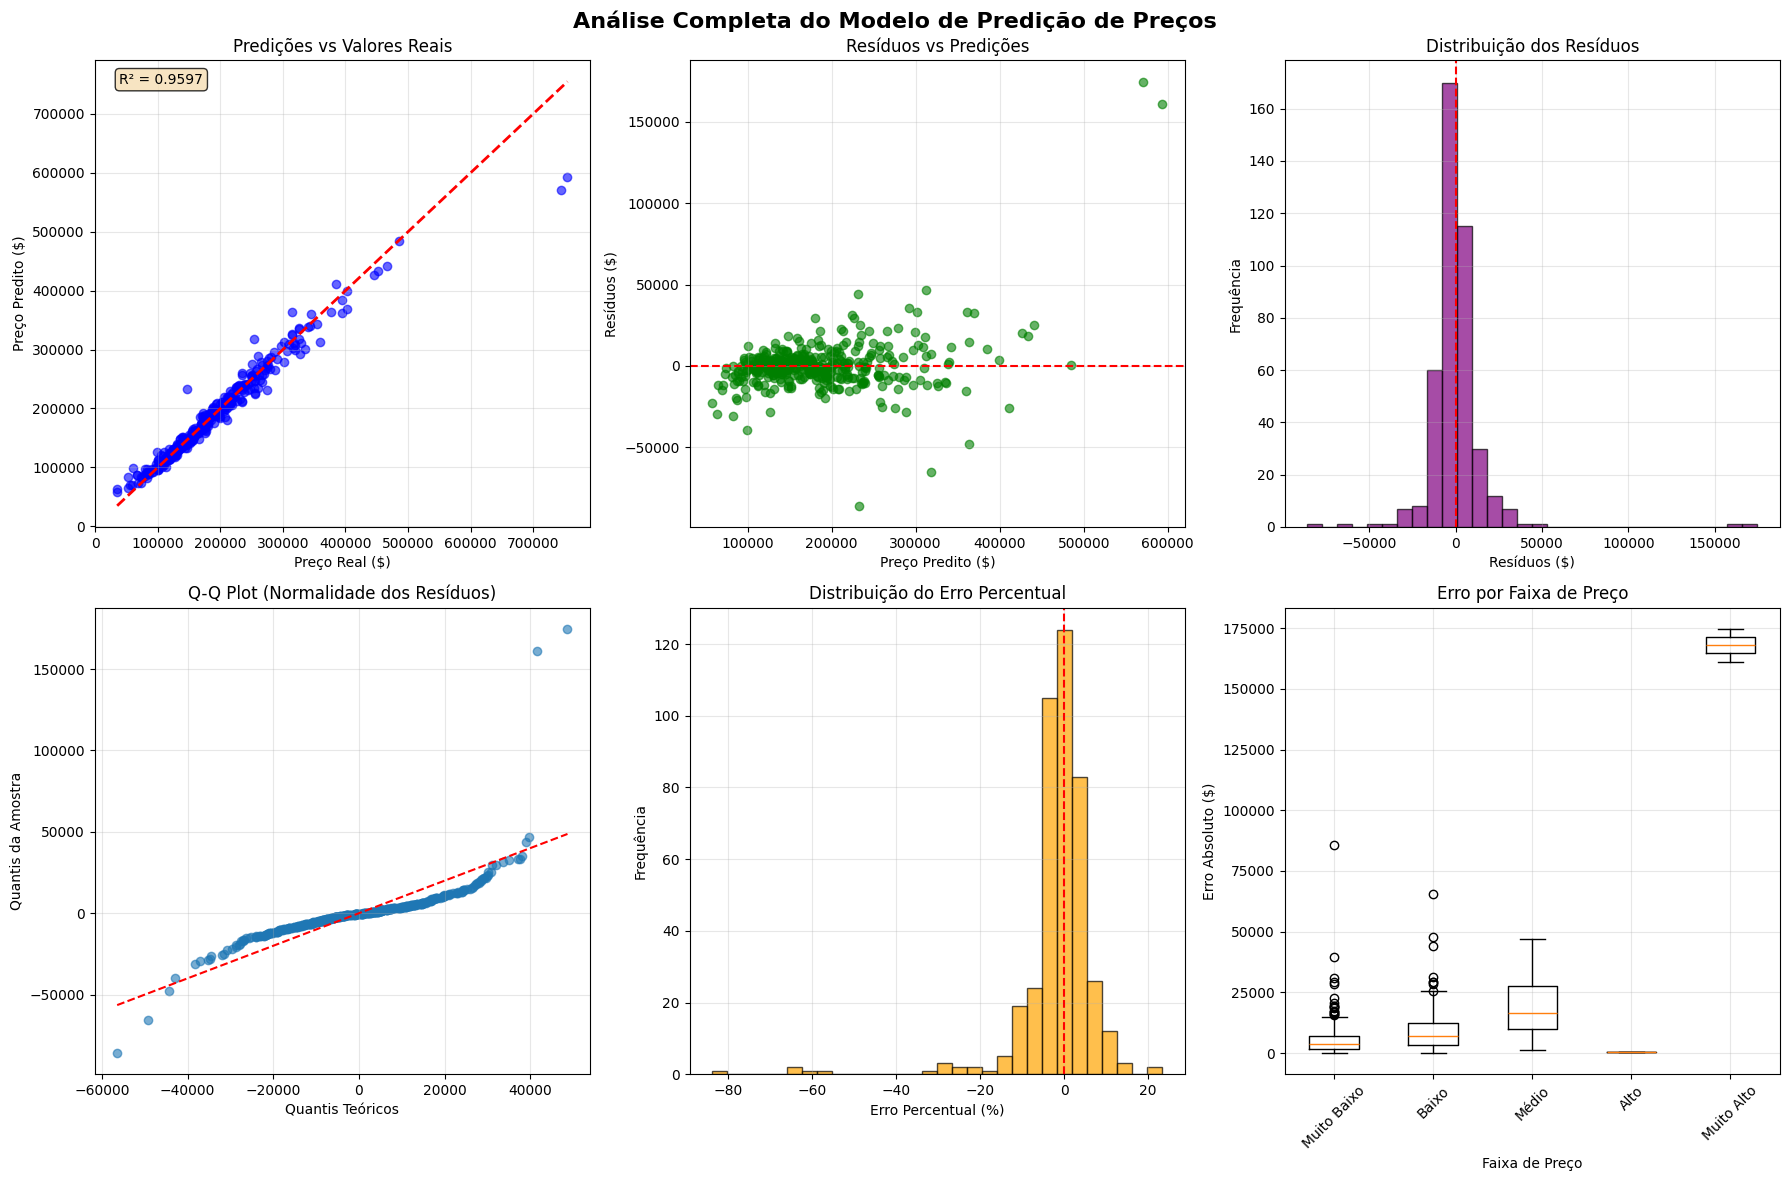

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. ANÁLISE DE RESÍDUOS
residuals = y_true - y_pred  # y verdadeiro menos y predito
relative_error = (residuals / y_true) * 100

print("="*60)
print("-> ANÁLISE DETALHADA DE PERFORMANCE")
print("="*60)

# 2. ESTATÍSTICAS DESCRITIVAS DOS ERROS
print("\n-> ESTATÍSTICAS DOS ERROS:")
print(f"Erro Médio (Bias): ${residuals.mean():,.2f}")
print(f"Desvio Padrão dos Erros: ${residuals.std():,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):,.2f}")
print(f"MAPE (Erro Percentual Médio): {np.mean(np.abs(relative_error)):.2f}%")
print(f"Mediana do Erro Absoluto: ${np.median(np.abs(residuals)):,.2f}")

# 3. ANÁLISE POR FAIXAS DE PREÇO
print("\n-> PERFORMANCE POR FAIXA DE PREÇO:")
price_ranges = pd.cut(y_true, bins=5, labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])
for range_name in price_ranges.categories:
    mask = price_ranges == range_name
    if mask.sum() > 0:
        range_mae = mean_absolute_error(y_true[mask], y_pred[mask])
        range_r2 = r2_score(y_true[mask], y_pred[mask])
        range_mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask]) * 100)
        print(f"{range_name}: MAE=${range_mae:,.0f}, R²={range_r2:.3f}, MAPE={range_mape:.1f}%")

# 4. PERCENTIS DE ERRO
print("\n-> DISTRIBUIÇÃO DOS ERROS ABSOLUTOS:")
abs_errors = np.abs(residuals)
percentiles = [50, 75, 90, 95, 99]
for p in percentiles:
    error_p = np.percentile(abs_errors, p)
    print(f"{p}% das predições têm erro ≤ ${error_p:,.0f}")

# 5. OUTLIERS
print("\n-> ANÁLISE DE OUTLIERS:")
q75, q25 = np.percentile(abs_errors, [75, 25])
iqr = q75 - q25
outlier_threshold = q75 + 1.5 * iqr
outliers = abs_errors > outlier_threshold
print(f"Outliers (erros > ${outlier_threshold:,.0f}): {outliers.sum()} casos ({outliers.mean()*100:.1f}%)")

# 6. VISUALIZAÇÕES
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise Completa do Modelo de Predição de Preços', fontsize=16, fontweight='bold')

# Plot 1: Predito vs Real
axes[0,0].scatter(y_true, y_pred, alpha=0.6, color='blue')
axes[0,0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Preço Real ($)')
axes[0,0].set_ylabel('Preço Predito ($)')
axes[0,0].set_title('Predições vs Valores Reais')
axes[0,0].grid(True, alpha=0.3)

# Adicionar R² no gráfico
axes[0,0].text(0.05, 0.95, f'R² = {r2:.4f}', transform=axes[0,0].transAxes, 
               bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Plot 2: Resíduos vs Predições
axes[0,1].scatter(y_pred, residuals, alpha=0.6, color='green')
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Preço Predito ($)')
axes[0,1].set_ylabel('Resíduos ($)')
axes[0,1].set_title('Resíduos vs Predições')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Distribuição dos Resíduos
axes[0,2].hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[0,2].axvline(x=0, color='r', linestyle='--')
axes[0,2].set_xlabel('Resíduos ($)')
axes[0,2].set_ylabel('Frequência')
axes[0,2].set_title('Distribuição dos Resíduos')
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Q-Q Plot para normalidade dos resíduos (CORRIGIDO)
try:
    probplot(residuals, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot (Normalidade dos Resíduos)')
    axes[1,0].grid(True, alpha=0.3)
except: # lidando com alguns erros
    residuals_sorted = np.sort(residuals)
    theoretical_quantiles = np.random.normal(0, residuals.std(), len(residuals))
    theoretical_quantiles.sort()
    axes[1,0].scatter(theoretical_quantiles, residuals_sorted, alpha=0.6)
    axes[1,0].plot([theoretical_quantiles.min(), theoretical_quantiles.max()], 
                   [theoretical_quantiles.min(), theoretical_quantiles.max()], 'r--')
    axes[1,0].set_xlabel('Quantis Teóricos')
    axes[1,0].set_ylabel('Quantis da Amostra')
    axes[1,0].set_title('Q-Q Plot (Normalidade dos Resíduos)')
    axes[1,0].grid(True, alpha=0.3)

# Plot 5: Erro Percentual
axes[1,1].hist(relative_error, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].axvline(x=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Erro Percentual (%)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição do Erro Percentual')
axes[1,1].grid(True, alpha=0.3)

# Plot 6: Boxplot dos erros por faixa de preço
error_by_range = [abs_errors[price_ranges == cat] for cat in price_ranges.categories if (price_ranges == cat).sum() > 0]
axes[1,2].boxplot(error_by_range, labels=[cat for cat in price_ranges.categories if (price_ranges == cat).sum() > 0])
axes[1,2].set_xlabel('Faixa de Preço')
axes[1,2].set_ylabel('Erro Absoluto ($)')
axes[1,2].set_title('Erro por Faixa de Preço')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Insights da análise

1. Predições vs Valores reais: possui um excelente ajuste, com pontos bem alinhados à linha diagnonal. Com 96,35% da variância sendo explicada pelo modelo. 

2. Analisando Resíduos vs Predições, percebe-se que a variância dos erros é relativamente constante, indicando uma homocedasticidade. Com resíduos distribuídos aleatoriamente em torno de zero, indicando que não há padrões. Há alguns resíduos extremos em casas de alto valor, onde é necessário uma atenção ao tentar prever casas de alto valor. 

3. Analisando a Distribuição dos resíduos, vemos que uma distribuição normal simétrica, com valores concentrados em torno de zero, indicando que os dados estão simétricos em torno da média. Pela simetria, podemos ver que o modelo tem pouco viés. Com dados com pico no zero, a maioria dos erros é pequena.

4. Analisando a normlidade dos resíduos através do Q-Q Plot, percebe-se uma boa normalidade mas com alguns outliers, visto nas caudas pesadas do gráfico. Portanto, alguns resíduos extremos não seguem distribuição normal. Isso é um complemento de (2).

5. Analisando a disstribuição do erro percentual, nota-se que a maioria dos erros está entre -10% e +10%, indicando uma concentração em zero. Com uma distribuição levemente assimétrica, existe um pequeno viés para superestimação e poucos erros grandes.

6. Analisando os erros por faixa de preço, conclui-se que o erro absoluto aumenta com o preço.

In [27]:
# 7. ANÁLISE DE CONFIABILIDADE
print("\n-> INTERVALOS DE CONFIANÇA:")
std_residuals = residuals.std()
confidence_levels = [68, 95, 99]
z_scores = [1, 1.96, 2.58]

for conf, z in zip(confidence_levels, z_scores):
    interval = z * std_residuals
    print(f"{conf}% das predições estão dentro de ±${interval:,.0f}")

# 8. MÉTRICAS DE NEGÓCIO
print("\n-> MÉTRICAS DE NEGÓCIO:")
accuracy_5pct = np.mean(np.abs(relative_error) <= 5) * 100
accuracy_10pct = np.mean(np.abs(relative_error) <= 10) * 100
accuracy_15pct = np.mean(np.abs(relative_error) <= 15) * 100

print(f"Predições com erro ≤ 5%: {accuracy_5pct:.1f}%")
print(f"Predições com erro ≤ 10%: {accuracy_10pct:.1f}%")
print(f"Predições com erro ≤ 15%: {accuracy_15pct:.1f}%")

# 9. TESTE DE NORMALIDADE DOS RESÍDUOS (CORRIGIDO)
try:
    shapiro_stat, shapiro_p = shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
    print(f"\n-> TESTE DE NORMALIDADE (Shapiro-Wilk):")
    print(f"Estatística: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
    print("Resíduos são normais" if shapiro_p > 0.05 else "Resíduos não são perfeitamente normais")
except:
    print(f"\n-> ANÁLISE DE NORMALIDADE:")
    # Teste alternativo simples
    skewness = ((residuals - residuals.mean()) ** 3).mean() / (residuals.std() ** 3)
    print(f"Assimetria dos resíduos: {skewness:.4f}")
    print("Próximo de 0 indica normalidade" if abs(skewness) < 0.5 else "Distribuição assimétrica")

# 10. RESUMO FINAL
print("\n" + "="*60)
print("RESUMO")
print("="*60)
print(f"-> Modelo com R² de {r2:.1%}")
print(f"-> Erro médio de ${np.mean(abs_errors):,.0f} ({np.mean(np.abs(relative_error)):.1f}%)")
print(f"-> {accuracy_10pct:.0f}% das predições com erro ≤ 10%")
print(f"-> {outliers.sum()} outliers identificados ({outliers.mean()*100:.1f}%)")
print(f"-> O modelo é de alta qualidade, com boa capacidade de previsão e confiabilidade,  especialmente na faixa de preços típica ($100k - $400k), mas requer cuidado ao tentar prever preços muito altos, onde a variabilidade é maior e a precisão pode ser menor.")


-> INTERVALOS DE CONFIANÇA:
68% das predições estão dentro de ±$16,670
95% das predições estão dentro de ±$32,673
99% das predições estão dentro de ±$43,008

-> MÉTRICAS DE NEGÓCIO:
Predições com erro ≤ 5%: 72.4%
Predições com erro ≤ 10%: 89.7%
Predições com erro ≤ 15%: 95.0%

-> ANÁLISE DE NORMALIDADE:
Assimetria dos resíduos: 4.4960
Distribuição assimétrica

RESUMO
-> Modelo com R² de 96.0%
-> Erro médio de $8,515 (5.0%)
-> 90% das predições com erro ≤ 10%
-> 28 outliers identificados (6.7%)
-> O modelo é de alta qualidade, com boa capacidade de previsão e confiabilidade,  especialmente na faixa de preços típica ($100k - $400k), mas requer cuidado ao tentar prever preços muito altos, onde a variabilidade é maior e a precisão pode ser menor.


In [29]:
## Submission predictions to CSV

output.to_csv('submission_random_forest.csv', index=False)

## Predição usando algoritmo Gradient Boosting - XGBoost

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [31]:
## Preparing data for label encoding

def prepare_data_label_encoding(df, target_column='SalePrice'):
    
    # Separar features e target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Identificar colunas categóricas e numéricas
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    print(f"Colunas categóricas: {len(categorical_cols)}")
    print(f"Colunas numéricas: {len(numerical_cols)}")
    
    # Aplicar Label Encoding nas categóricas
    le_dict = {}
    X_encoded = X.copy()
    
    for col in categorical_cols:
        le = LabelEncoder()
        # Tratar valores nulos
        X_encoded[col] = X_encoded[col].fillna('Missing')
        X_encoded[col] = le.fit_transform(X_encoded[col])
        le_dict[col] = le
    
    # Tratar valores nulos nas numéricas
    X_encoded[numerical_cols] = X_encoded[numerical_cols].fillna(X_encoded[numerical_cols].median())
    
    return X_encoded, y, le_dict, categorical_cols, numerical_cols


X, y, label_encoders, cat_cols, num_cols = prepare_data_label_encoding(df)

Colunas categóricas: 43
Colunas numéricas: 37


In [32]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=None)

print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")

Treino: (1095, 80)
Teste: (365, 80)


In [33]:
# Training

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Treinar
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [34]:
# Predicting and evaluating

def evaluate_model(model, X_test, y_test, model_name="XGBoost"):

    # Predicting
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n=== {model_name} Performance ===")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"R²: {r2:.4f}")
    
    return y_pred, {'mae': mae, 'rmse': rmse, 'r2': r2}

# Evaluating the model
y_pred, metrics = evaluate_model(xgb_model, X_test, y_test)


=== XGBoost Performance ===
MAE: $15,702.95
RMSE: $24,352.21
R²: 0.9153


## Insigths

1. O modelo erra, em média, por $15,702.95 no preço previsto. 
2. Com diferença de $ 8,6 entre MAE vs RSME, é notável a presença de alguns erros grandes, penalizando tais erros de forma exponencial.
3. R² score: o modelo explica 91,53% da variação nos preços dos imóveis, e o restante não é capturada pelo modelo. Portanto, tem uma perfomance muito boa, no geral

In [35]:
# Hiperparameter tuning and cross-validation 
from sklearn.model_selection import RandomizedSearchCV

def tune_xgboost(X_train, y_train):
    """
    hiperparameter optimization using RandomizedSearchCV
    """
    # Search space for hyperparameters
    param_distributions = {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.7, 0.8, 0.9],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
        'reg_alpha': [0, 0.01, 0.1, 1],
        'reg_lambda': [0, 0.01, 0.1, 1]
    }
    
    # Base XGBoost model
    xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)
    
    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        xgb_base,
        param_distributions,
        n_iter=50,  # Combinations to try
        scoring='neg_mean_absolute_error',
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    
    # Run the search
    print("Iniciando tuning de hiperparâmetros...")
    random_search.fit(X_train, y_train)
    
    print("Melhores parâmetros:", random_search.best_params_)
    print("Melhor score:", -random_search.best_score_)
    
    return random_search.best_estimator_

# Running tunning 
best_xgb_model = tune_xgboost(X_train, y_train)
y_pred_tuned, metrics_tuned = evaluate_model(best_xgb_model, X_test, y_test, "XGBoost Tuned")

Iniciando tuning de hiperparâmetros...


Melhores parâmetros: {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Melhor score: 16399.8482421875

=== XGBoost Tuned Performance ===
MAE: $14,579.11
RMSE: $24,344.24
R²: 0.9154


In [36]:
# Comparing models: XGBoost vs Decision Forests

from sklearn.ensemble import RandomForestRegressor

# Random Forest 
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf, metrics_rf = evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Comparing metrics
print("\n=== COMPARAÇÃO DE MODELOS ===")
print(f"XGBoost R²: {metrics['r2']:.4f}")
print(f"Random Forest R²: {metrics_rf['r2']:.4f}")


=== Random Forest Performance ===
MAE: $17,280.32
RMSE: $28,023.71
R²: 0.8879

=== COMPARAÇÃO DE MODELOS ===
XGBoost R²: 0.9153
Random Forest R²: 0.8879


#### TODO: Optimize XGBOOs

In [37]:
# Optimizing XGBoost with advanced hyperparameters

params_advanced = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.03, 0.05, 0.07],
    'max_depth': [4, 5, 6, 7],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

## TODO: implement MLP 